In [18]:
# For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# For Data Manipulation
import numpy as np 
import pandas as pd
import sklearn
from itertools import cycle


# For Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For Classification Results
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.exceptions import NotFittedError

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Importing Models
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.neighbors import KNeighborsClassifier as KNN #K-Nearest Neighbors
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.model_selection import GridSearchCV

In [7]:
df = pd.read_csv('C:/Users/dimas/Downloads/UTS_AI/winequality-red.csv', 
                   sep = ';', 
                   engine = 'python')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: quality, dtype: float64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


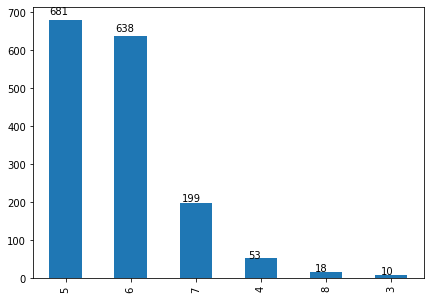

In [9]:
ax = df["quality"].value_counts().plot.bar(figsize=(7,5))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    
print(df["quality"].value_counts(normalize=True)*100)

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
df["is good"] = 0
df.loc[df["quality"]>=7,"is good"] = 1
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 0.5), color="white")
    
print(df["is good"].value_counts(normalize=True)*100)

0    86.429018
1    13.570982
Name: is good, dtype: float64


In [14]:
features = df.columns[:-2]
output = df.columns[-1]
print("Features: \n{}, \n\nLabels: \n{}".format(features.values,output))

Features: 
['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol'], 

Labels: 
is good


In [15]:
X = df[features].values
y = df[output].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.50)
print('Training size: {}, Testing size: {}'.format(X_train.size,X_test.size))

Training size: 8789, Testing size: 8800


In [17]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [24]:
def get_probabilty_output(X_test, model_fitted, value_count=10):
    def highlight_max(data, color='yellow'):
        attr = 'background-color: {}'.format(color)
        if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
            is_max = data == data.max()
            return [attr if v else '' for v in is_max]
        else:  # from .apply(axis=None)
            is_max = data == data.max().max()
            return pd.DataFrame(np.where(is_max, attr, ''), index=data.index, columns=data.columns)
        
    y_scores = model_fitted.predict_proba(X_test)
    prob_df = pd.DataFrame(y_scores*100).head(value_count)
    styled_df = prob_df.style.background_gradient(cmap='Reds')
    styled_df = styled_df.highlight_max(axis=1, color='green')
    return styled_df

In [30]:
def get_classification_report(y_test,predictions,average="macro"):
    #Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True)
    plt.title("Confusion Matrix")
    
    acc = accuracy_score(y_test, predictions)
    pre = precision_score(y_test, predictions, average=average)
    rec = recall_score(y_test, predictions, average=average)
    # Prediction Report
    print(classification_report(y_test, predictions, digits=3))
    print("Overall Accuracy:", acc)
    print("Overall Precision:", pre)
    print("Overall Recall:", rec)
    
    return acc,pre,rec

In [36]:
def get_classification_ROC(X,y,model,test_size,model_fitted=False,random_state=0):
    
    def check_fitted(clf): 
        return hasattr(clf, "classes_")
    
    if(len(np.unique(y)) == 2):
        #Binary Classifier
        if not check_fitted(model):
            model = model.fit(X,y)
        
        plot_roc_curve(model, X, y)
        y_score = model.predict_proba(X)[:, 1]
        fpr, tpr, threshold = roc_curve(y, y_score)
        auc = roc_auc_score(y, y_score)
        return auc
#         print("False Positive Rate: {} \nTrue Positive Rate: {} \nThreshold:{}".format(fpr,tpr,threshold))
    
    else:
        #Multiclass Classifier
        y_bin = label_binarize(y, classes=np.unique(y))
        n_classes = y_bin.shape[1]

        # shuffle and split training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=test_size, random_state=random_state)

        # Learn to predict each class against the other
        classifier = OneVsRestClassifier(model)
        model_fitted = classifier.fit(X_train, y_train)
        try:
            y_score = model_fitted.decision_function(X_test)
        except:
            y_score = model_fitted.predict_proba(X_test)



        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])


        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


        plt.figure()
        lw = 2
        plt.plot(fpr[2], tpr[2], color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic averaged')
        plt.legend(loc="lower right")
        plt.show()



        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure(figsize=(10,10))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]),
                 color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]),
                 color='navy', linestyle=':', linewidth=4)

        colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'blue', 'purple', 'green'])
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                     label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(i, roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('multi-class ROC (One vs All)')
        plt.legend(loc="lower right")
        plt.show()

In [45]:
def visualisation_through_PCA(X_PCA, y, model_PCA, model_name="Classification Model"):
    X_set, y_set = X_PCA, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, model_PCA.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue', 'yellow', 'purple', 'grey')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green', 'blue', 'yellow', 'purple', 'grey'))(i), label = j)
    plt.title(model_name)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

In [47]:
pca = PCA(n_components = 2)
X_train_PCA_2 = pca.fit_transform(X_train)
X_test_PCA_2 = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("Variance Explained by each of the Principal Components: {:.{prec}f}% and {:.{prec}f}%, \nTotal Variance Explained: {:.{prec}f}%".format((explained_variance*100)[0],
                                                                                                                                               (explained_variance*100)[1],
                                                                                                                                                  explained_variance.sum()*100,prec=3))

Variance Explained by each of the Principal Components: 28.362% and 17.780%, 
Total Variance Explained: 46.142%


# Hapus aja yg bawah

In [48]:
parameters_DT = {
    'criterion':('gini','entropy'),
    'max_features': ('auto','sqrt','log2')
}


model_DT = DecisionTreeClassifier()
model_DT_with_best_params = GridSearchCV(model_DT, parameters_DT)
model_DT_with_best_params.fit(X_train,y_train)
model_DT_best_params = model_DT_with_best_params.best_params_
model_DT_with_best_params.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ('gini', 'entropy'),
                

In [49]:
model_DT_best_params

{'criterion': 'entropy', 'max_features': 'sqrt'}

In [50]:
predictions_DT = model_DT_with_best_params.predict(X_test)
print("Predictions:",predictions_DT[:10])
print("Actual:",y_test[:10])

Predictions: [0 0 0 0 0 0 0 1 0 0]
Actual: [0 0 0 0 0 0 0 1 1 0]


In [51]:
get_probabilty_output(X_test=X_test, model_fitted=model_DT_with_best_params)

,0,1
0,100.000000,0.000000
1,100.000000,0.000000
2,100.000000,0.000000
3,100.000000,0.000000
4,100.000000,0.000000
5,100.000000,0.000000
6,100.000000,0.000000
7,0.000000,100.000000
8,100.000000,0.000000
9,100.000000,0.000000


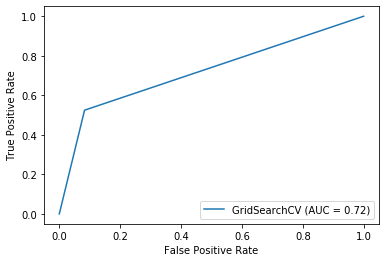

In [52]:
auc_DT = get_classification_ROC(X_test,y_test,model_DT_with_best_params,test_size=0.3,random_state=0)

              precision    recall  f1-score   support

           0      0.930     0.917     0.924       699
           1      0.477     0.525     0.500       101

    accuracy                          0.868       800
   macro avg      0.704     0.721     0.712       800
weighted avg      0.873     0.868     0.870       800

Overall Accuracy: 0.8675
Overall Precision: 0.7039056473018737
Overall Recall: 0.7208883978526608


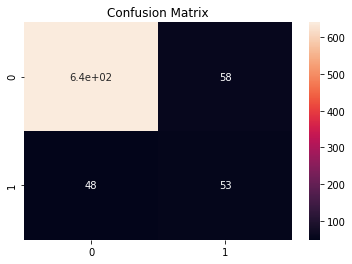

In [53]:
acc_DT,pre_DT,rec_DT = get_classification_report(y_test,predictions_DT)

In [54]:
model_DT_PCA = DecisionTreeClassifier(criterion="entropy", random_state=0)
model_DT_PCA.fit(X_train_PCA_2, y_train)
predictions_DT_PCA = model_DT_PCA.predict(X_test_PCA_2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


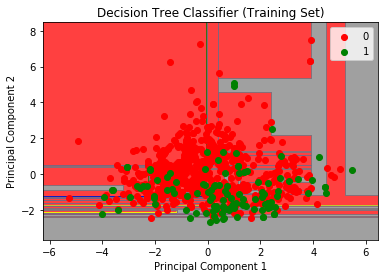

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


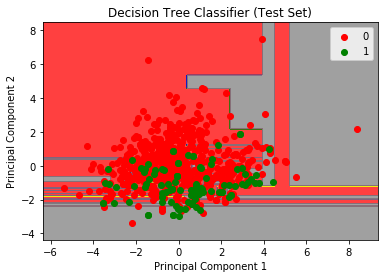

In [55]:
visualisation_through_PCA(X_train_PCA_2, y_train, model_DT_PCA, model_name="Decision Tree Classifier (Training Set)")
visualisation_through_PCA(X_test_PCA_2, y_test, model_DT_PCA, model_name="Decision Tree Classifier (Test Set)")